In [58]:
!pip install citipy
!conda install -c conda-forge gmaps
!jupyter nbextension enable --py gmaps

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.0

Please update conda by running

    $ conda update -n base conda


Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from scipy import stats
from api_keys import (gkey)



In [62]:
since=2005
until=2016

In [3]:
url_crime=(f"https://api.usa.gov/crime/fbi/sapi/api/data/arrest/national/offense/monthly/{since}/{until}?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv")


In [4]:
url_crime

'https://api.usa.gov/crime/fbi/sapi/api/data/arrest/national/offense/monthly/2005/2016?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv'

In [6]:
response = requests.get(url_crime)
response_json = response.json()
print(json.dumps(response_json, indent=4, sort_keys=True))

{
    "pagination": {
        "count": 144,
        "page": 0,
        "pages": 1,
        "per_page": 0
    },
    "results": [
        {
            "aggravated_assault": 26177,
            "all_other_offenses": 233423,
            "arson": 926,
            "burglary": 18162,
            "csv_header": null,
            "curfew": 6568,
            "data_year": 2005,
            "disorderly": 38444,
            "driving": 81589,
            "drug_abuse_gt": 105863,
            "drug_poss_m": 40226,
            "drug_poss_opium": 22457,
            "drug_poss_other": 18945,
            "drug_poss_subtotal": 85309,
            "drug_poss_synthetic": 3677,
            "drug_sales_m": 5236,
            "drug_sales_opium": 8461,
            "drug_sales_other": 4523,
            "drug_sales_subtotal": 19957,
            "drug_sales_synthetic": 1741,
            "drunkness": 31597,
            "embezzlement": 1253,
            "forgery": 7651,
            "fraud": 22800,
            "g_all": 

In [ ]:
# DAta source:
# https://crime-data-explorer.fr.cloud.gov/downloads-and-docs
# https://www.data.gov/

In [11]:

states_crime_path = "hatecrime2018.csv"

# Read the cities data:

states_crime_df = pd.read_csv(states_crime_path)

states_crime_df

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,94795,2003,SC0070000,Beaufort,NaN,County,SC,South Carolina,South Atlantic,South,...,White,NaN,1,Wire Fraud,0.0,Residence/Home,Anti-Physical Disability,Individual,S,S
1,120103,2006,CT0014000,Thomaston,NaN,City,CT,Connecticut,New England,Northeast,...,Unknown,NaN,1,Wire Fraud,1.0,Other/Unknown,Anti-White,Individual,S,S
2,125292,2007,UT0060100,Bountiful,NaN,City,UT,Utah,Mountain,West,...,White,NaN,1,Wire Fraud,1.0,Specialty Store,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual,S,S
3,145418,2010,MI6370200,Rochester,NaN,City,MI,Michigan,East North Central,Midwest,...,Unknown,NaN,1,Wire Fraud,1.0,Residence/Home,Anti-Gay (Male),Individual,S,S
4,149897,2010,UT0180600,West Jordan,NaN,City,UT,Utah,Mountain,West,...,Unknown,NaN,1,Wire Fraud,1.0,Other/Unknown,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201398,504918,2018,WIMPD0000,Milwaukee,NaN,City,WI,Wisconsin,East North Central,Midwest,...,Black or African American,Not Hispanic or Latino,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Gay (Male),Individual,S,S
201399,463493,2018,WV0020000,Berkeley,NaN,County,WV,West Virginia,South Atlantic,South,...,White,Unknown,1,Aggravated Assault,1.0,Residence/Home,Anti-Catholic,Individual,S,S
201400,466122,2018,WV0160000,Hardy,NaN,County,WV,West Virginia,South Atlantic,South,...,White,Unknown,1,Aggravated Assault,1.0,Field/Woods,Anti-Female,Individual,S,S
201401,463526,2018,WV0190300,Ranson,NaN,City,WV,West Virginia,South Atlantic,South,...,White,Unknown,2,Aggravated Assault,2.0,Residence/Home,Anti-Black or African American,Individual,S,S


In [421]:
states_weaponcrime_df = states_crime_df[["DATA_YEAR", "INCIDENT_ID","STATE_ABBR","STATE_NAME",
                                         "LOCATION_NAME", "VICTIM_TYPES","OFFENSE_NAME", "OFFENDER_RACE", "BIAS_DESC" ]]

states_weaponcrime_df

,DATA_YEAR,INCIDENT_ID,STATE_ABBR,STATE_NAME,LOCATION_NAME,VICTIM_TYPES,OFFENSE_NAME,OFFENDER_RACE,BIAS_DESC
0,2003,94795,SC,South Carolina,Residence/Home,Individual,Wire Fraud,White,Anti-Physical Disability
1,2006,120103,CT,Connecticut,Other/Unknown,Individual,Wire Fraud,Unknown,Anti-White
2,2007,125292,UT,Utah,Specialty Store,Individual,Wire Fraud,White,"Anti-Lesbian, Gay, Bisexual, or Transgender (M..."
3,2010,145418,MI,Michigan,Residence/Home,Individual,Wire Fraud,Unknown,Anti-Gay (Male)
4,2010,149897,UT,Utah,Other/Unknown,Individual,Wire Fraud,Unknown,Anti-White
...,...,...,...,...,...,...,...,...,...
201398,2018,504918,WI,Wisconsin,Highway/Road/Alley/Street/Sidewalk,Individual,Aggravated Assault,Black or African American,Anti-Gay (Male)
201399,2018,463493,WV,West Virginia,Residence/Home,Individual,Aggravated Assault,White,Anti-Catholic
201400,2018,466122,WV,West Virginia,Field/Woods,Individual,Aggravated Assault,White,Anti-Female
201401,2018,463526,WV,West Virginia,Residence/Home,Individual,Aggravated Assault,White,Anti-Black or African American


In [422]:
states_weaponcrime_df = states_weaponcrime_df.loc[states_weaponcrime_df["OFFENSE_NAME"].str.contains("Weapon", na=False)]

states_weaponcrime_df = states_weaponcrime_df.dropna()

states_weaponcrime_df
                                                     

,DATA_YEAR,INCIDENT_ID,STATE_ABBR,STATE_NAME,LOCATION_NAME,VICTIM_TYPES,OFFENSE_NAME,OFFENDER_RACE,BIAS_DESC
19,1993,17207,IL,Illinois,School/College,Society/Public,Weapon Law Violations,Unknown,Anti-White
20,1993,12264,IL,Illinois,Highway/Road/Alley/Street/Sidewalk,Society/Public,Weapon Law Violations,Black or African American,Anti-White
21,1993,12266,IL,Illinois,Highway/Road/Alley/Street/Sidewalk,Society/Public,Weapon Law Violations,Black or African American,Anti-White
22,1993,17221,IL,Illinois,Highway/Road/Alley/Street/Sidewalk,Society/Public,Weapon Law Violations,Black or African American,Anti-White
23,1993,12365,IL,Illinois,Highway/Road/Alley/Street/Sidewalk,Society/Public,Weapon Law Violations,White,Anti-Black or African American
...,...,...,...,...,...,...,...,...,...
179846,2009,138817,MI,Michigan,Bar/Nightclub,Individual;Society/Public,Aggravated Assault;Destruction/Damage/Vandalis...,White,Anti-Black or African American
179873,2006,114603,DE,Delaware,Parking/Drop Lot/Garage,Individual;Society/Public,Aggravated Assault;Destruction/Damage/Vandalis...,White,Anti-Hispanic or Latino
180290,2000,67828,MI,Michigan,Residence/Home,Individual;Society/Public,Aggravated Assault;Burglary/Breaking & Enterin...,White,Anti-Black or African American
180291,2015,176455,KS,Kansas,Residence/Home,Individual;Society/Public,Aggravated Assault;Burglary/Breaking & Enterin...,White,"Anti-Multiple Races, Group"


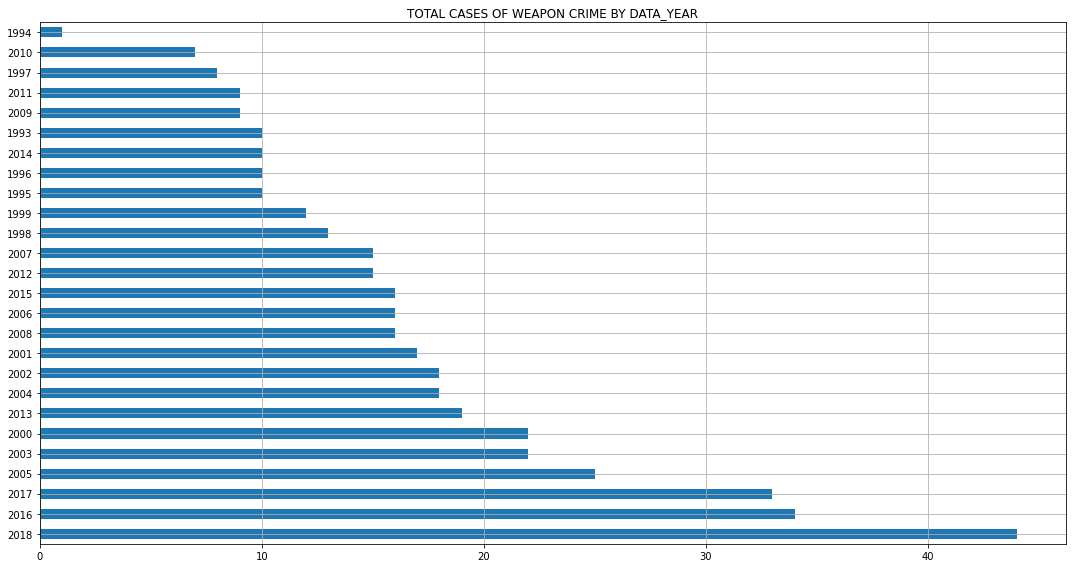

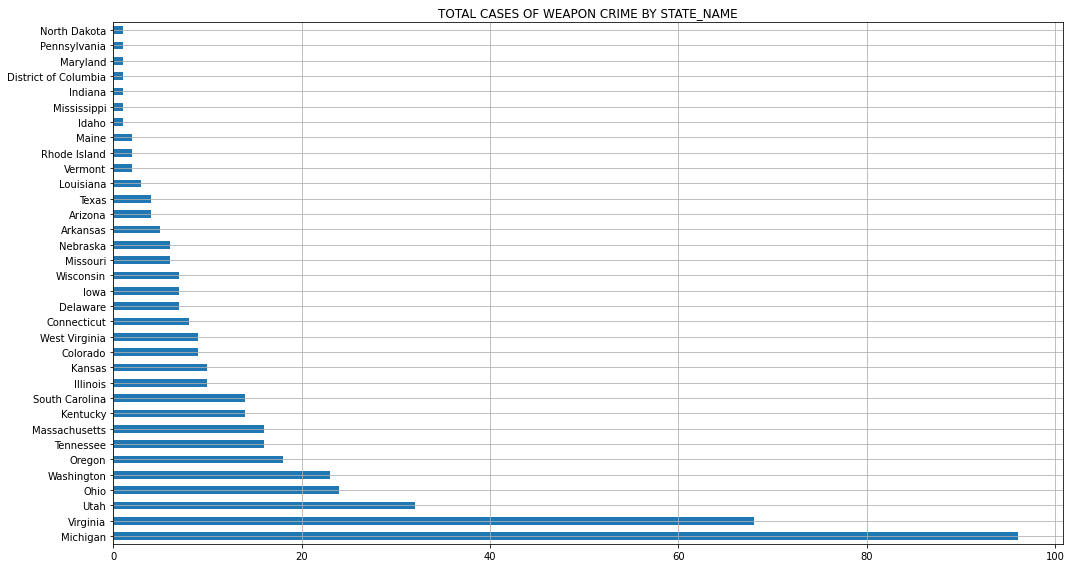

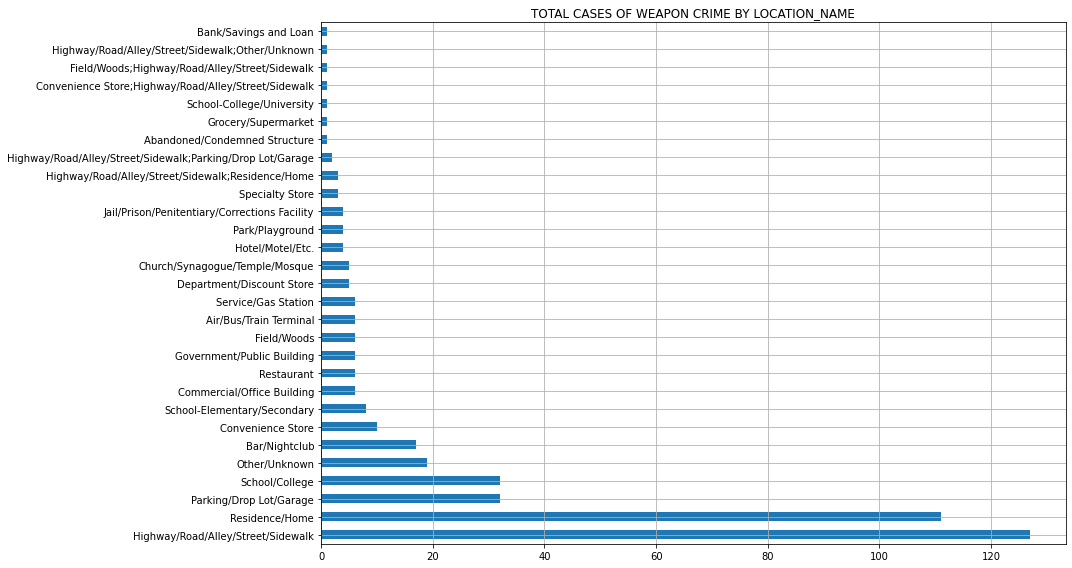

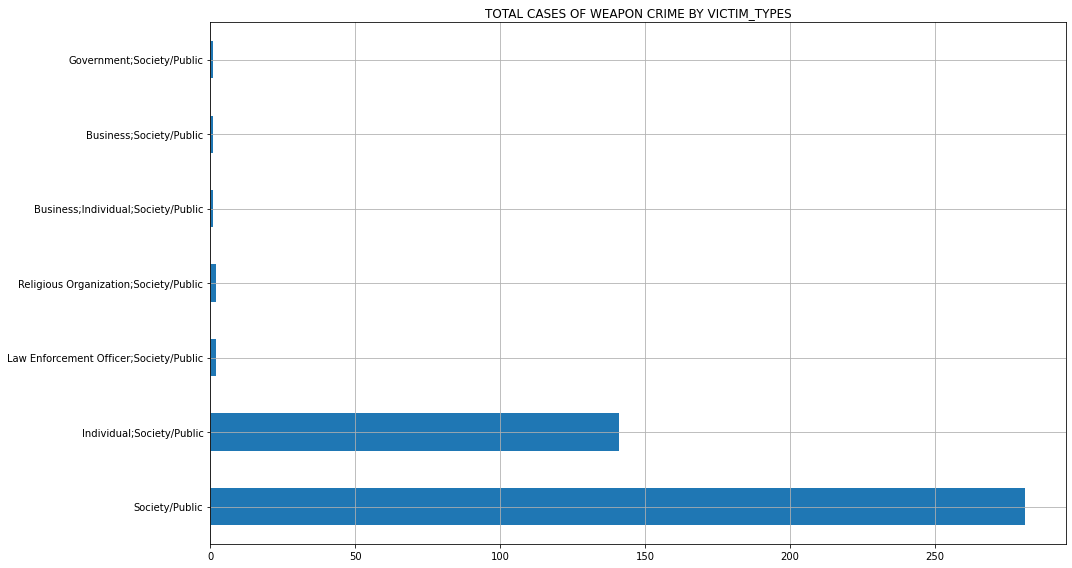

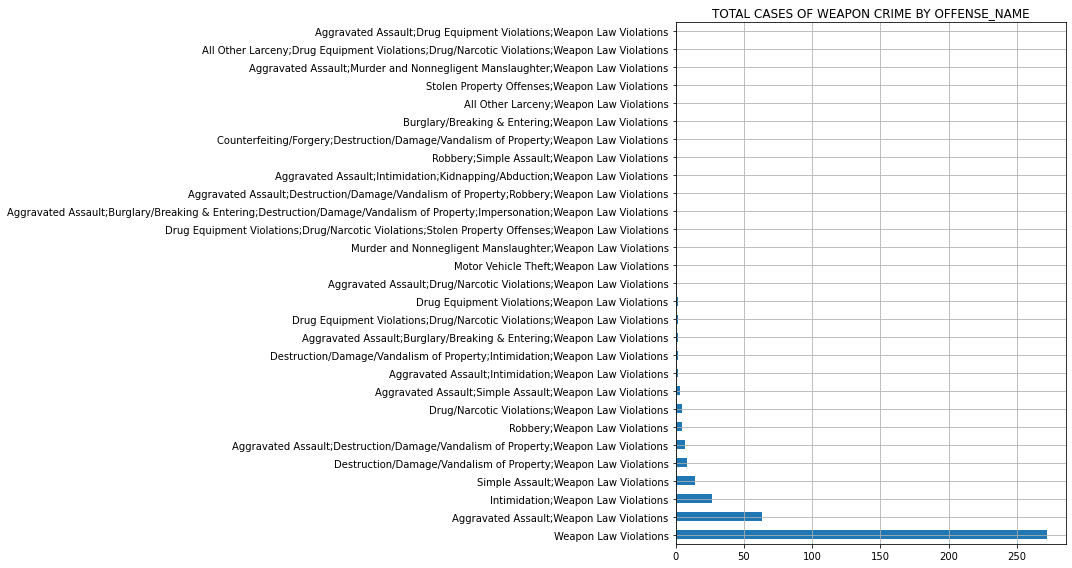

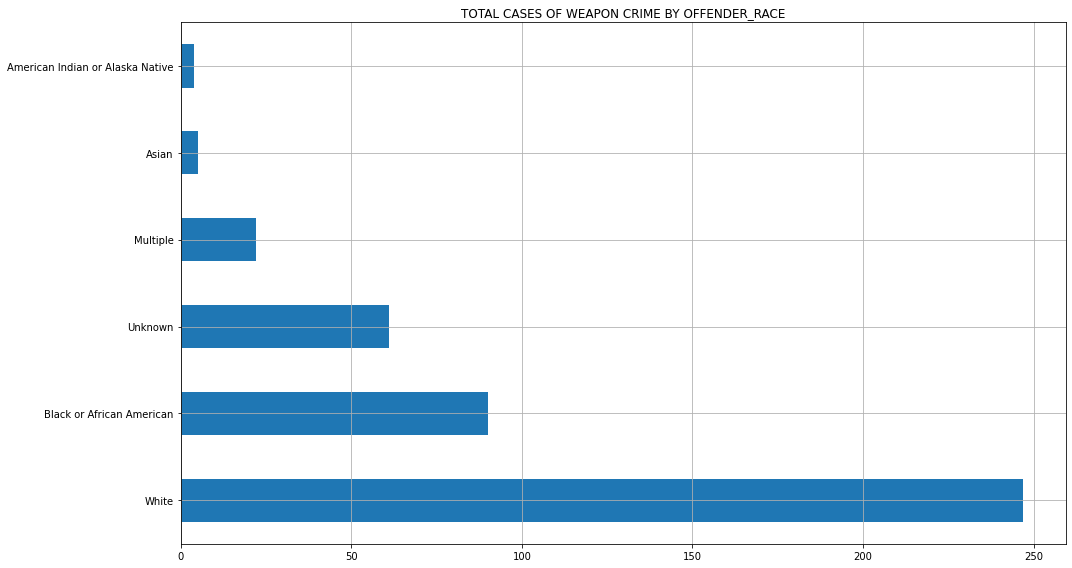

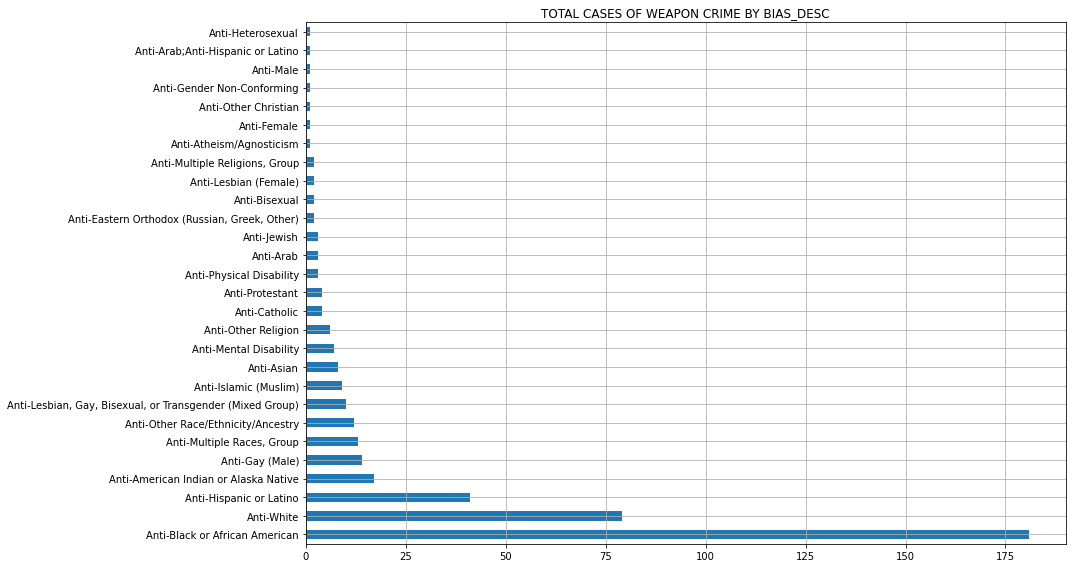

In [423]:
y_list = ["DATA_YEAR","STATE_NAME","LOCATION_NAME","VICTIM_TYPES","OFFENSE_NAME","OFFENDER_RACE","BIAS_DESC"]

weapon_offensecount = []

for y in y_list:
    weapon_offensecount=states_weaponcrime_df[y].value_counts()
    
    weapon_offensecount.plot.barh(legend=False, figsize=(15,8), rot =0)
    
        
# Text on the top of each barplot
#     for index, row in states_weaponcrime_df.iterrows():
    
#         xs = row[y]
#         ys = row[weapon_offensecount]

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,1), # distance from text to points (x,y)
#                      va='center') # horizontal alignment can be left, right or center


    # Adjust the margins
    
    plt.subplots_adjust(bottom= 0.2, top = 0.98)


    plt.title(f"TOTAL CASES OF WEAPON CRIME BY {y}")

    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [424]:
print(f"COMMENTS:")
print(f"---------------- ")
print(f"The graph shows the total cases of weapon crime increased through years and jumped reaching the peak at 2018.")
print(f" ")
print(f"The total cases of weapon crime mainly happened in:")
print(f"school/College, parking/Drop Lot/Garage, Residence/Home & Highway/Alley/Street/SideWalk")
print(f" ")
print(f"Residence/Home & Highway/Alley/Street/SideWalk are the highest places for weapon crime occured")
print(f" ")
print(f"Virginia and Michigan are the most comon states for weapon crime occurence")
print(f" ")
print(f"The main offender race are Black and White, but white is the most common.")
print(f" ")
print(f"The main victim types are mainly Individual/Society/Public, but Society/Public is the most common.")
print(f" ")
print(f"The main Bias Description for effenders' motives are Anti-Black or African American.")

COMMENTS:
---------------- 
The graph shows the total cases of weapon crime increased through years and jumped reaching the peak at 2018.
 
The total cases of weapon crime mainly happened in:
school/College, parking/Drop Lot/Garage, Residence/Home & Highway/Alley/Street/SideWalk
 
Residence/Home & Highway/Alley/Street/SideWalk are the highest places for weapon crime occured
 
Virginia and Michigan are the most comon states for weapon crime occurence
 
The main offender race are Black and White, but white is the most common.
 
The main victim types are mainly Individual/Society/Public, but Society/Public is the most common.
 
The main Bias Description for effenders' motives are Anti-Black or African American.


In [412]:
states_latlong_path = "statelatlong.csv"
states_latlong_df = pd.read_csv(states_latlong_path)

states_latlong_df.rename(columns={"State":"STATE_ABBR"},inplace = True)


weapon_merge_df = pd.merge(states_weaponcrime_df, states_latlong_df, how="left", on=["STATE_ABBR"])

weapon_merge_df = weapon_merge_df.drop_duplicates()

weapon_merge_df = weapon_merge_df.reset_index()
weapon_merge_df

,index,DATA_YEAR,INCIDENT_ID,STATE_ABBR,STATE_NAME,LOCATION_NAME,VICTIM_TYPES,OFFENSE_NAME,OFFENDER_RACE,Latitude,Longitude,City
0,0,1993,17207,IL,Illinois,School/College,Society/Public,Weapon Law Violations,Unknown,39.739318,-89.504139,Illinois
1,1,1993,12264,IL,Illinois,Highway/Road/Alley/Street/Sidewalk,Society/Public,Weapon Law Violations,Black or African American,39.739318,-89.504139,Illinois
2,2,1993,12266,IL,Illinois,Highway/Road/Alley/Street/Sidewalk,Society/Public,Weapon Law Violations,Black or African American,39.739318,-89.504139,Illinois
3,3,1993,17221,IL,Illinois,Highway/Road/Alley/Street/Sidewalk,Society/Public,Weapon Law Violations,Black or African American,39.739318,-89.504139,Illinois
4,4,1993,12365,IL,Illinois,Highway/Road/Alley/Street/Sidewalk,Society/Public,Weapon Law Violations,White,39.739318,-89.504139,Illinois
...,...,...,...,...,...,...,...,...,...,...,...,...
424,424,2009,138817,MI,Michigan,Bar/Nightclub,Individual;Society/Public,Aggravated Assault;Destruction/Damage/Vandalis...,White,44.943560,-86.415805,Michigan
425,425,2006,114603,DE,Delaware,Parking/Drop Lot/Garage,Individual;Society/Public,Aggravated Assault;Destruction/Damage/Vandalis...,White,39.145251,-75.418921,Delaware
426,426,2000,67828,MI,Michigan,Residence/Home,Individual;Society/Public,Aggravated Assault;Burglary/Breaking & Enterin...,White,44.943560,-86.415805,Michigan
427,427,2015,176455,KS,Kansas,Residence/Home,Individual;Society/Public,Aggravated Assault;Burglary/Breaking & Enterin...,White,38.498779,-98.320078,Kansas


In [413]:
#weapon_merge_df.dropna(inplace=True)

weapon_merge_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          429 non-null    int64  
 1   DATA_YEAR      429 non-null    int64  
 2   INCIDENT_ID    429 non-null    int64  
 3   STATE_ABBR     429 non-null    object 
 4   STATE_NAME     429 non-null    object 
 5   LOCATION_NAME  429 non-null    object 
 6   VICTIM_TYPES   429 non-null    object 
 7   OFFENSE_NAME   429 non-null    object 
 8   OFFENDER_RACE  429 non-null    object 
 9   Latitude       423 non-null    float64
 10  Longitude      423 non-null    float64
 11  City           423 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 40.3+ KB


In [415]:
data_map = weapon_merge_df.groupby(by=["STATE_ABBR","Latitude", "Longitude"]).count()
data_map

,,,index,DATA_YEAR,INCIDENT_ID,STATE_NAME,LOCATION_NAME,VICTIM_TYPES,OFFENSE_NAME,OFFENDER_RACE,City
STATE_ABBR,Latitude,Longitude,,,,,,,,,
AR,34.751928,-92.131378,5,5,5,5,5,5,5,5,5
AZ,34.168219,-111.930907,4,4,4,4,4,4,4,4,4
CO,38.997934,-105.550567,9,9,9,9,9,9,9,9,9
CT,41.518784,-72.757507,8,8,8,8,8,8,8,8,8
DC,38.899349,-77.014567,1,1,1,1,1,1,1,1,1
DE,39.145251,-75.418921,7,7,7,7,7,7,7,7,7
IA,41.938317,-93.389798,7,7,7,7,7,7,7,7,7
ID,45.494576,-114.142430,1,1,1,1,1,1,1,1,1
IL,39.739318,-89.504139,10,10,10,10,10,10,10,10,10


In [418]:
df_weaponcrime_count = pd.DataFrame(data_map)
df_weaponcrime_count = df_weaponcrime_count.reset_index()

locations = df_weaponcrime_count[["Latitude","Longitude"]]
weaponcrime_states = df_weaponcrime_count["INCIDENT_ID"]


In [419]:
# Create a Weapon Crime Heatmap layer

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights = weaponcrime_states, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 2)

fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(height='420px'))